- Project: Companion Bot
- Team: Yuxin Liang, Tiantian Ma
- CS6140 Machine Learning - Fall 2025

# DailyDialog Dataset: Understanding and Pre-processing
The DailyDialog dataset was previously available publicly on http://yanran.li/dailydialog but currently inaccessible. We already downloaded the data file before.     
The dataset consists of 13,118 multi-turn dialogues, each containing multiple utterances. The provided zip file includes the utterance text along with corresponding emotion and act labels.  
Emotion labels include numerical representations of no-emotion, anger, disgust, fear, happiness, sadness, surprise. Act labels include numerical representation of inform, question, directive, and commissive. The zip file also provides pre-divided training, validation, and test sets, with similar distributions of emotion and act labels across the train, validation, and test sets.   

**For our project, we can use the DailyDialog to fine tune a text-generation model to generate context-aware responses with better control the emotional tone if desired. But in the end, we decided not to use this dataset due to extreme emotion imbalance based analysis in this notebook.**

## Dataset License
This notebook uses the DailyDialog dataset (Li et al., 2017), licensed under CC BY-NC-SA 4.0.


## Import Modules

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading
Note: This requires uploading the ijcnlp_dailydialog.zip into the Colab Files to continue running the following code.

In [11]:
# Unzip dataset zip file
!unzip ijcnlp_dailydialog.zip
!unzip ijcnlp_dailydialog/train.zip -d ijcnlp_dailydialog/
!unzip ijcnlp_dailydialog/validation.zip -d ijcnlp_dailydialog/
!unzip ijcnlp_dailydialog/test.zip -d ijcnlp_dailydialog/

Archive:  ijcnlp_dailydialog.zip
   creating: ijcnlp_dailydialog/
  inflating: ijcnlp_dailydialog/.DS_Store  
  inflating: ijcnlp_dailydialog/dialogues_act.txt  
  inflating: ijcnlp_dailydialog/dialogues_emotion.txt  
  inflating: ijcnlp_dailydialog/dialogues_text.txt  
  inflating: ijcnlp_dailydialog/dialogues_topic.txt  
  inflating: ijcnlp_dailydialog/readme.txt  
  inflating: ijcnlp_dailydialog/test.zip  
 extracting: ijcnlp_dailydialog/train.zip  
  inflating: ijcnlp_dailydialog/validation.zip  
Archive:  ijcnlp_dailydialog/train.zip
   creating: ijcnlp_dailydialog/train/
  inflating: ijcnlp_dailydialog/train/dialogues_act_train.txt  
  inflating: ijcnlp_dailydialog/train/dialogues_emotion_train.txt  
  inflating: ijcnlp_dailydialog/train/dialogues_train.txt  
Archive:  ijcnlp_dailydialog/validation.zip
   creating: ijcnlp_dailydialog/validation/
  inflating: ijcnlp_dailydialog/validation/dialogues_act_validation.txt  
  inflating: ijcnlp_dailydialog/validation/dialogues_emotion_v

In [12]:
# Intent mapping
intent_map = {
    1: 'inform',
    2: 'question',
    3: 'directive',
    4: 'commissive'
}

# Emotion mapping
emotion_map = {
    0: 'no emotion',
    1: 'anger',
    2: 'disgust',
    3: 'fear',
    4: 'happiness',
    5: 'sadness',
    6: 'surprise'
}

In [13]:
# File paths
# train dataset
train_text = "./ijcnlp_dailydialog/train/dialogues_train.txt"
train_act = "./ijcnlp_dailydialog/train/dialogues_act_train.txt"
train_emotion = "./ijcnlp_dailydialog/train/dialogues_emotion_train.txt"

# validation dataset
validation_text = "./ijcnlp_dailydialog/validation/dialogues_validation.txt"
validation_act = "./ijcnlp_dailydialog/validation/dialogues_act_validation.txt"
validation_emotion = "./ijcnlp_dailydialog/validation/dialogues_emotion_validation.txt"

# test dataset
test_text = "./ijcnlp_dailydialog/test/dialogues_test.txt"
test_act = "./ijcnlp_dailydialog/test/dialogues_act_test.txt"
test_emotion = "./ijcnlp_dailydialog/test/dialogues_emotion_test.txt"

In [14]:

def load_dailydialog(text_file, action_file, emotion_file, context_size=1):
    """
    Load and process the DailyDialog dataset into a context-response format.

    Args:
        text_file (str): Path to 'dialogues_text.txt'
        action_file (str): Path to 'dialogues_act.txt'
        emotion_file (str): Path to 'dialogues_emotion.txt'
        context_size (int): How many previous utterances to include as context

    Returns:
        pd.DataFrame: DataFrame with columns [dialogue_id, context, response, act, emotion]
    """
    data = []
    dialogue_id = 0

    with open(text_file, "r") as f_text, open(action_file, "r") as f_action, open(emotion_file, "r") as f_emotion:
        for line_text, line_act, line_emo in zip(f_text, f_action, f_emotion):
            utterances = [u.strip() for u in line_text.strip().split("__eou__") if u.strip()]
            acts = line_act.strip().split()
            emotions = line_emo.strip().split()

            # Ensure lengths match
            if not (len(utterances) == len(acts) == len(emotions)):
                continue

            # Build context-response pairs
            for i in range(context_size, len(utterances)):
                context = " ".join(utterances[i - context_size:i])
                response = utterances[i]
                act = int(acts[i])
                emotion = int(emotions[i])
                data.append({
                    "dialogue_id": dialogue_id,
                    "context": context,
                    "response": response,
                    "act": act,
                    "emotion": emotion
                })
            dialogue_id += 1

    df = pd.DataFrame(data)
    print(f"Loaded {len(df)} context-response pairs from {dialogue_id} dialogues.")
    return df

In [15]:
# Load training, validation, test data from files into DataFrame

train_df = load_dailydialog(train_text, train_act, train_emotion)
validation_df = load_dailydialog(validation_text, validation_act, validation_emotion)
test_df = load_dailydialog(test_text, test_act, test_emotion)

Loaded 76052 context-response pairs from 11118 dialogues.
Loaded 7069 context-response pairs from 1000 dialogues.
Loaded 6740 context-response pairs from 1000 dialogues.


In [16]:
# Show data - act and emotion labels are for response
train_df.head(10)

,dialogue_id,context,response,act,emotion
0,0,"Say , Jim , how about going for a few beers af...",You know that is tempting but is really not go...,4,0
1,0,You know that is tempting but is really not go...,What do you mean ? It will help us to relax .,2,0
2,0,What do you mean ? It will help us to relax .,Do you really think so ? I don't . It will jus...,2,0
3,0,Do you really think so ? I don't . It will jus...,I guess you are right.But what shall we do ? I...,2,0
4,0,I guess you are right.But what shall we do ? I...,I suggest a walk over to the gym where we can ...,3,0
5,0,I suggest a walk over to the gym where we can ...,That's a good idea . I hear Mary and Sally oft...,4,4
6,0,That's a good idea . I hear Mary and Sally oft...,"Sounds great to me ! If they are willing , we ...",1,4
7,0,"Sounds great to me ! If they are willing , we ...",Good.Let ' s go now .,3,4
8,0,Good.Let ' s go now .,All right .,4,4
9,1,Can you do push-ups ?,Of course I can . It's a piece of cake ! Belie...,1,0


In [17]:
# Display shape of data
print("train data shape: ", train_df.shape)
print("validation data shape: ", validation_df.shape)
print("test data shape: ", test_df.shape)

train data shape:  (76052, 5)
validation data shape:  (7069, 5)
test data shape:  (6740, 5)


## Data Preprocessing

### Remove Empty And Duplicated Context-Response Pairs

In [18]:
# Remove empty context and response in the train, validation, test dataset
train_df = train_df[(train_df['context'].str.strip() != "") & (train_df['response'].str.strip() != "")]
validation_df = validation_df[(validation_df['context'].str.strip() != "") & (validation_df['response'].str.strip() != "")]
test_df = test_df[(test_df['context'].str.strip() != "") & (test_df['response'].str.strip() != "")]

In [19]:
# Display shape of data
print("train data shape: ", train_df.shape)
print("validation data shape: ", validation_df.shape)
print("test data shape: ", test_df.shape)

train data shape:  (76052, 5)
validation data shape:  (7069, 5)
test data shape:  (6740, 5)


- No Empty context or response.

In [20]:
# Remove repeated context-response pairs
train_df = train_df.drop_duplicates(subset=['context', 'response']).reset_index(drop=True)
validation_df = validation_df.drop_duplicates(subset=['context', 'response']).reset_index(drop=True)
test_df = test_df.drop_duplicates(subset=['context', 'response']).reset_index(drop=True)

In [21]:
# Display shape of data
print("train data shape: ", train_df.shape)
print("validation data shape: ", validation_df.shape)
print("test data shape: ", test_df.shape)

train data shape:  (69298, 5)
validation data shape:  (6996, 5)
test data shape:  (6695, 5)


- Remove 6754, 73, 45 duplicated context-response pairs

In [22]:
train_df_copy = train_df.copy()
val_df_copy = validation_df.copy()
test_df_copy = test_df.copy()

## Data Analysis

### Understand Distributions of Response Length, Emotions, and Acts

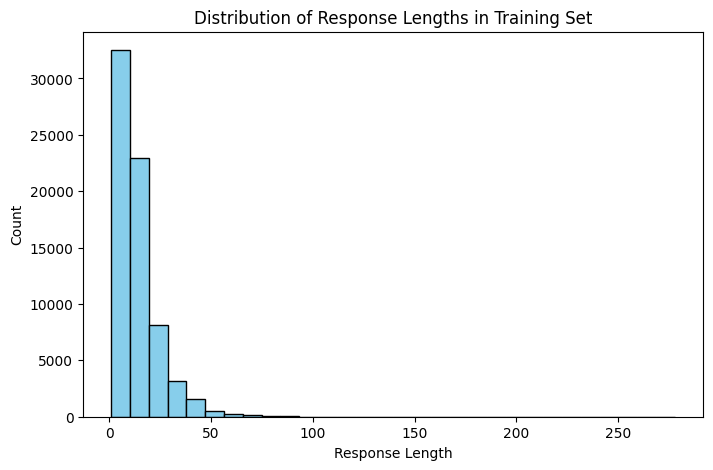

In [23]:
# Distribution response length (how many words in response)
plt.figure(figsize=(8,5))
train_df_copy['response_length'] = train_df_copy['response'].str.split().apply(len)
plt.hist(train_df_copy['response_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Response Lengths in Training Set')
plt.xlabel('Response Length')
plt.ylabel('Count')

plt.show()

- Most of the responses are short reponses with length less than 50 words.

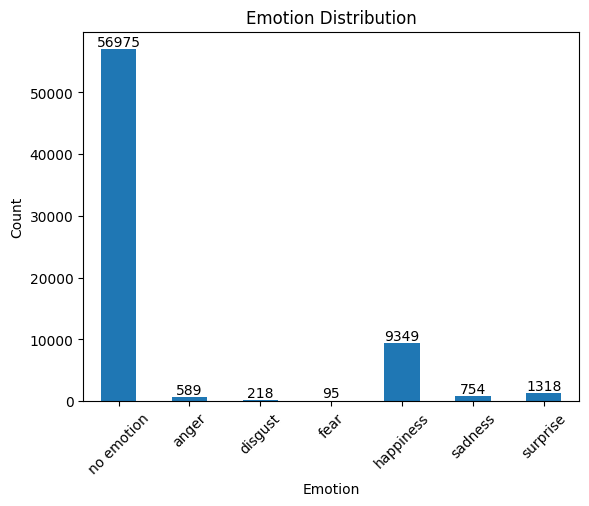

In [24]:
# emotion distribution
counts_emo = train_df_copy['emotion'].value_counts().sort_index()
counts_emo.plot(kind='bar')
plt.xticks(ticks=range(len(counts_emo)), labels=[emotion_map[i] for i in counts_emo.index], rotation=45)
for i, v in enumerate(counts_emo): # show counts
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

- The diagram reveals a severe imbalance in the dataset, with the "no emotion" category dominating with over 50,000 samples, while most other emotion classes have very few samples. Such an imbalance is not helpful in fine tuning a model capable of controlling emotional tone in responses.

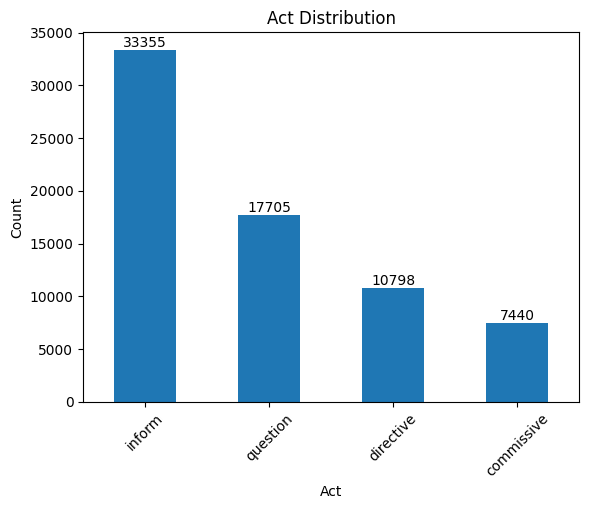

In [25]:
# Act distribution
counts_act = train_df_copy['act'].value_counts().sort_index()
counts_act.plot(kind='bar')
plt.xticks(ticks=range(len(counts_act)), labels=[intent_map[i] for i in counts_act.index], rotation=45)
for i, v in enumerate(counts_act): # show counts
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Act')
plt.ylabel('Count')
plt.title('Act Distribution')
plt.show()

The act labels show a much more balanced distribution compared to emotion labels. However, act labels are irrelevant to our project.

### Understand Content Distribution
- Use SentenceTransformer to get texts into vectors (similar meanings have similar vectors)
- Use K-means to cluster similar content

In [26]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Text vectorization
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(train_df_copy['response'].tolist(), show_progress_bar=True)

# Clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_df_copy['cluster'] = kmeans.fit_predict(embeddings)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2166 [00:00<?, ?it/s]

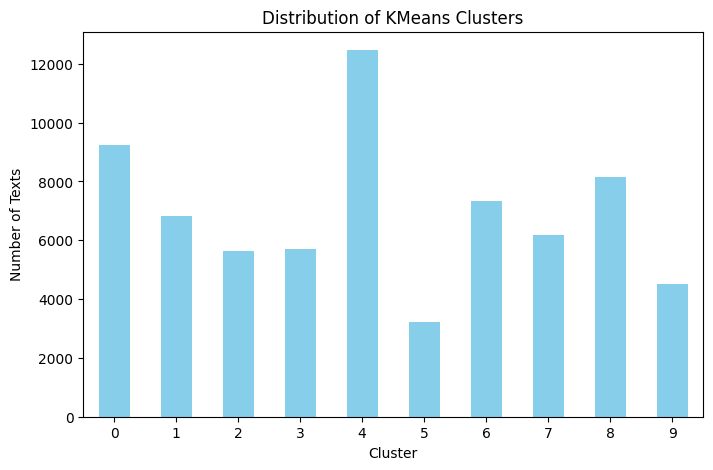

In [27]:
# Show similar content distribution
cluster_counts = train_df_copy['cluster'].value_counts().sort_index()

plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Texts')
plt.title('Distribution of KMeans Clusters')
plt.xticks(rotation=0)
plt.show()

From the K-means clustering results, we can observe that the number of texts in each cluster is relatively balanced, suggesting that the dataset contains diverse but comparably sized groups of similar content.

## Summary:
In the DailyDialog dataset, the “no_emotion” category constitutes the majority of samples, which may limit the model’s ability to accurately learn the minority emotion categories. Therefore, we decided not to continue using this dataset.